In [35]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

#
from sklearn.model_selection import train_test_split

#keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Conv1D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

%matplotlib inline


In [40]:

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    print(U)
    print(V)
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 100 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]



def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

[0.65883852 0.65753446 0.65364368 0.64723008 0.63839897 0.62729535
 0.61410155 0.5990342  0.58234071 0.56429519 0.54519394 0.52535061
 0.50509103 0.48474784 0.4646551  0.44514273 0.4265311  0.40912584
 0.39321272 0.37905305 0.36687933 0.35689144 0.34925339 0.3440906
 0.34148783 0.34148783 0.3440906  0.34925339 0.35689144 0.36687933
 0.37905305 0.39321272 0.40912584 0.4265311  0.44514273 0.4646551
 0.48474784 0.50509103 0.52535061 0.54519394 0.56429519 0.58234071
 0.5990342  0.61410155 0.62729535 0.63839897 0.64723008 0.65364368
 0.65753446 0.65883852]
[0.5        0.52031182 0.54029012 0.55960685 0.57794485 0.59500299
 0.61050118 0.62418495 0.63582961 0.64524395 0.65227338 0.65680249
 0.65875691 0.65810454 0.6548561  0.64906493 0.64082612 0.63027494
 0.61758466 0.60296364 0.58665195 0.56891745 0.55005132 0.53036335
 0.51017682 0.48982318 0.46963665 0.44994868 0.43108255 0.41334805
 0.39703636 0.38241534 0.36972506 0.35917388 0.35093507 0.3451439
 0.34189546 0.34124309 0.34319751 0.34772

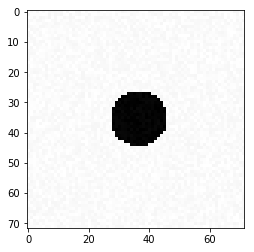

In [41]:
im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

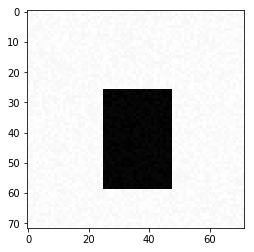

In [21]:
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

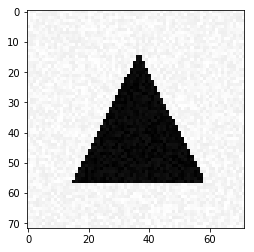

In [22]:
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

In [23]:
[X, y] = generate_dataset_classification(1000, 20)


Creating data:
0
100
200
300
400
500
600
700
800
900


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Modelisation

In [39]:
import math
math.sqrt(5184)

72.0

In [32]:
X_train.shape

(670, 5184)

In [36]:

# dimensions of our images.
img_width, img_height = 550, 550
#275, 3300

#train_data_dir = './Data/Parabolic/trainGeneratedHour3'
#validation_data_dir = './Data/Parabolic/validationGeneratedHour3'
nb_train_samples = 1393
nb_validation_samples = 183
input_shape = X_train.shape[0]
epochs = 3
batch_size = 16

model = Sequential()
model.add(Conv1D(32, (6, 6), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(32, (6, 6)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(64, (6, 6)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsProp',
              metrics=['accuracy'])


TypeError: 'int' object is not iterable

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
verbose = 1000)

model.save_weights('./first_tryHour6.h5')